In [1]:
def impulse1D(distance,time,mass,dispersion,velocity):
    import math
    term1 = math.sqrt(4.0*math.pi*dispersion*time)
    term2 = math.exp(-((distance-velocity*time)**2)/(4.0*dispersion*time))
    impulse1D = (mass/term1)*term2
    return(impulse1D)

200.0


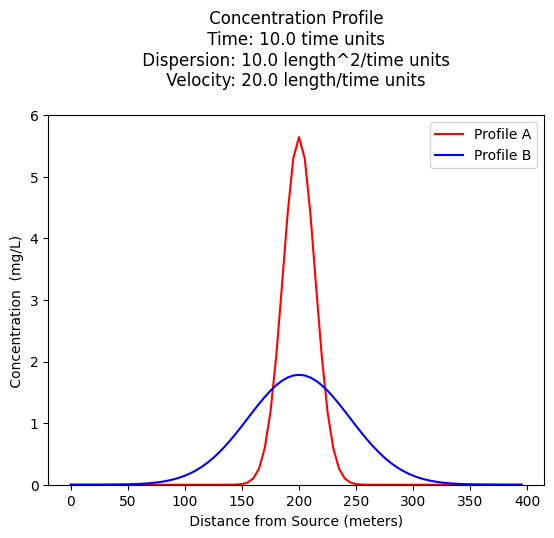

Total Mass :  200.0  kg


In [2]:
thick       = 1.0
width       = 100.0
length      = 0.01 # small but non-zero
volume      = thick*width*length
porosity    = 0.5
c0          = 100.0 # kg/m^3
mass        = (c0*volume)/(porosity)
print(mass)
dispersion  = 10.0 #m^2/day
velocity    = 20.0 #m/day
deltax      = 5.0 #meters
howmany     = 80 #how many points to compute
x = [] #meters
for i in range(howmany):
    x.append(float(i)*deltax)
    
time        = 10.0 # days

c1 = [0 for i in range(howmany)] #concentration 
c2 = [0 for i in range(howmany)] #concentration 
for i in range(howmany):
    c1[i]=impulse1D(x[i],time,mass,dispersion,velocity)
    c2[i]=impulse1D(x[i],time,mass,10*dispersion,velocity)
#
# Import graphics routines for picture making
#
from matplotlib import pyplot as plt
#
# Build and Render the Plot
#
plt.plot(x,c1, color='red', linestyle = 'solid')  # make the plot object
plt.plot(x,c2, color="blue", linestyle = 'solid')
plt.title(" Concentration Profile \n Time: " + repr(time) + " time units \n" + " Dispersion: " + repr(dispersion) + " length^2/time units \n" + " Velocity: " + repr(velocity) + " length/time units \n") # caption the plot object
plt.xlabel(" Distance from Source (meters) ") # label x-axis
plt.ylabel(" Concentration  (mg/L)      ") # label y-axis
plt.legend(["Profile A","Profile B"])
plt.ylim(0, 6)
#plt.savefig("ogatabanksplot.png") # optional generates just a plot for embedding into a report
plt.show() # plot to stdio -- has to be last call as it kills prior objects
plt.close('all') # needed when plt.show call not invoked, optional here
#sys.exit() # used to elegant exit for CGI-BIN use
#print("Advective Front Position : ",round(time*velocity,2)," length units")
print("Total Mass : ",round(mass,3)," kg")

In [3]:
#
# prototype ogatabanks function
#
def ogatabanks(c_source,space,time,dispersion,velocity):
    from math import sqrt,erf,erfc,exp  # get special math functions
    term1 = erfc(((space-velocity*time))/(2.0*sqrt(dispersion*time)))
    term2 = exp(velocity*space/dispersion)
    term3 = erfc(((space+velocity*time))/(2.0*sqrt(dispersion*time)))
    #print(term3)
    ogatabanks = c_source*0.5*(term1+term2*term3)
    return(ogatabanks)

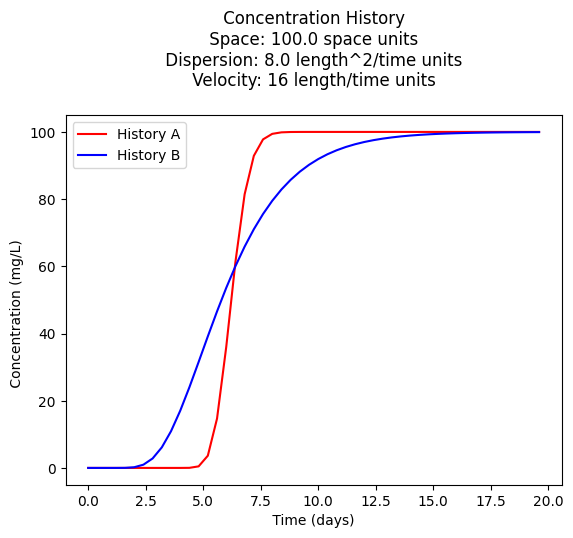

In [4]:
#
# example inputs
#
c_source = 100.0 # source concentration
space = 100.      # where in X-direction are we
time  = 20.      # how far in T-direction to extend the plot
dispersion = 8.0  # dispersion coefficient
velocity = 16    # pore velocity
#
# forward define and initialize vectors for a profile plot
#
how_many_points = 50   
deltat = time/how_many_points
t = [i*deltat for i in range(how_many_points)] # constructor notation
c1 = [0.0 for i in range(how_many_points)]      # constructor notation
c2 = [0.0 for i in range(how_many_points)]      # constructor notation
t[0]=1e-5 #cannot have zero time, so use really small value first position in list
#
# build the profile predictions
#
for i in range(0,how_many_points,1):
    c1[i] = ogatabanks(c_source,space,t[i],dispersion,velocity)
    c2[i] = ogatabanks(c_source,space,t[i],16*dispersion,velocity)
#
# Import graphics routines for picture making
#
from matplotlib import pyplot as plt
#
# Build and Render the Plot
#
plt.plot(t,c1, color='red', linestyle = 'solid')  # make the plot object
plt.plot(t,c2, color='blue', linestyle = 'solid')  # make the plot object
plt.title(" Concentration History \n Space: " + repr(space) + " space units \n" + " Dispersion: " + repr(dispersion) + " length^2/time units \n" + " Velocity: " + repr(velocity) + " length/time units \n") # caption the plot object
plt.xlabel(" Time (days) ") # label x-axis
plt.ylabel(" Concentration (mg/L)       ") # label y-axis
plt.legend(["History A","History B"])
#plt.savefig("ogatabanksplot.png") # optional generates just a plot for embedding into a report
plt.show() # plot to stdio -- has to be last call as it kills prior objects
plt.close('all') # needed when plt.show call not invoked, optional here
#sys.exit() # used to elegant exit for CGI-BIN use

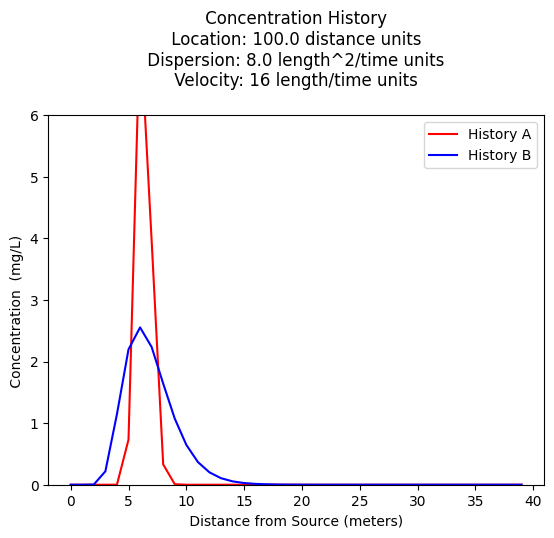

Total Mass :  200.0  kg


In [5]:
deltat      = 1.0 #days
howmany     = 40 #how many points to compute
t = [] #meters
for i in range(howmany):
    t.append((float(i)+0.00001)*deltat)
    
space        = 100.0 # meters

c1 = [0 for i in range(howmany)] #concentration 
c2 = [0 for i in range(howmany)] #concentration 
for i in range(howmany):
    c1[i]=impulse1D(space,t[i],mass,dispersion,velocity)
    c2[i]=impulse1D(space,t[i],mass,10*dispersion,velocity)
#
# Import graphics routines for picture making
#
from matplotlib import pyplot as plt
#
# Build and Render the Plot
#
plt.plot(t,c1, color='red', linestyle = 'solid')  # make the plot object
plt.plot(t,c2, color="blue", linestyle = 'solid')
plt.title(" Concentration History \n Location: " + repr(space) + " distance units \n" + " Dispersion: " + repr(dispersion) + " length^2/time units \n" + " Velocity: " + repr(velocity) + " length/time units \n") # caption the plot object
plt.xlabel(" Distance from Source (meters) ") # label x-axis
plt.ylabel(" Concentration  (mg/L)      ") # label y-axis
plt.legend(["History A","History B"])
plt.ylim(0, 6)
#plt.savefig("ogatabanksplot.png") # optional generates just a plot for embedding into a report
plt.show() # plot to stdio -- has to be last call as it kills prior objects
plt.close('all') # needed when plt.show call not invoked, optional here
#sys.exit() # used to elegant exit for CGI-BIN use
#print("Advective Front Position : ",round(time*velocity,2)," length units")
print("Total Mass : ",round(mass,3)," kg")

135.0


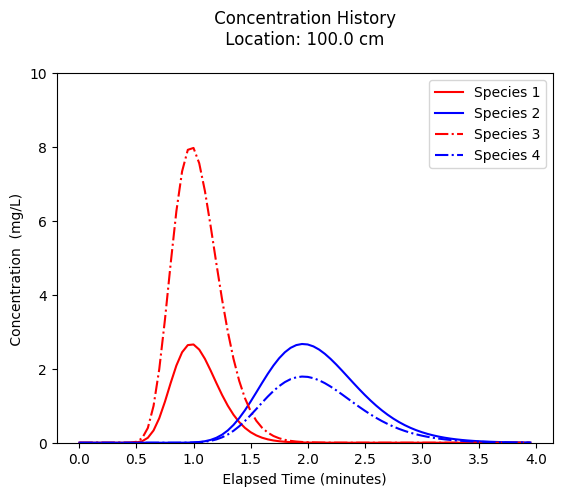

Total Mass :  135.0  kg


In [6]:
thick       = 10.0
width       = 100.0
length      = 0.001 # small but non-zero
volume      = thick*width*length
porosity    = 0.3
c0          = 40.5 # kg/m^3
mass        = (c0*volume)/(porosity)
print(mass)
dispersion  = 205.2 #m^2/day
velocity    = 100.0 #cm/minute
deltax      = 4/80 #meters
howmany     = 80 #how many points to compute
t = [] #meters
for i in range(howmany):
    t.append(float(i)*deltax)
    
t[0]=0.001
    
x      = 100.0 # days

c1 = [0 for i in range(howmany)] #concentration 
c2 = [0 for i in range(howmany)] #concentration 
c3 = [0 for i in range(howmany)] #concentration 
c4 = [0 for i in range(howmany)] #concentration 
for i in range(howmany):
    c1[i]=impulse1D(x,t[i],mass,dispersion,velocity)
    c2[i]=impulse1D(x,t[i],mass,dispersion/2,velocity/2)
    c3[i]=impulse1D(x,t[i],3*mass,dispersion,velocity)
    c4[i]=impulse1D(x,t[i],0.67*mass,dispersion/2,velocity/2)
#
# Import graphics routines for picture making
#
from matplotlib import pyplot as plt
#
# Build and Render the Plot
#
plt.plot(t,c1, color='red', linestyle = 'solid')  # make the plot object
plt.plot(t,c2, color="blue", linestyle = 'solid')
plt.plot(t,c3, color="red", linestyle = 'dashdot')
plt.plot(t,c4, color="blue", linestyle = 'dashdot')
plt.title(" Concentration History \n Location: " + repr(x) + " cm \n") # caption the plot object
plt.xlabel(" Elapsed Time (minutes) ") # label x-axis
plt.ylabel(" Concentration  (mg/L)      ") # label y-axis
plt.legend(["Species 1","Species 2","Species 3","Species 4"])
plt.ylim(0, 10)
#plt.savefig("ogatabanksplot.png") # optional generates just a plot for embedding into a report
plt.show() # plot to stdio -- has to be last call as it kills prior objects
plt.close('all') # needed when plt.show call not invoked, optional here
#sys.exit() # used to elegant exit for CGI-BIN use
#print("Advective Front Position : ",round(time*velocity,2)," length units")
print("Total Mass : ",round(mass,3)," kg")